# Курс "Компонентные модели"

## Автор: Харюк Павел, аспирант факультета ВМК МГУ имени М.В. Ломоносова
### Составлено: 2017-2018 гг.

# Занятие 7. Частотно-временные разложения

## От ряда Фурье к Фурье преобразованию

Ряд Фурье для периодичной функции $f(t) = f(t \pm nT)$:

$$f(t) = A_0/2 + \sum\limits_{n=1}^{\infty} A_n \sin(\omega_n t) + B_n \cos(\omega_n t)$$
$$A_0 = \frac{2}{T}\int\limits_{-T/2}^{T/2} f(t) dt = (f(t), {\bf 1}), \quad A_n = \frac{1}{T}\int\limits_{-T/2}^{T/2} f(t) \cos(\omega_n t)dt = (f(t), \cos(\omega_n t)),$$
$$B_n = \frac{2}{T}\int\limits_{-T/2}^{T/2} f(t) \sin(\omega_n t)dt = (f(t), \sin(\omega_n t))$$

$$\omega_n = \frac{2 \pi n}{T}$$

Комплекснозначная запись:

$$e^{i \omega_n t} = \cos(\omega_n t ) + i \sin(\omega_n t),$$

$$f(t) = \sum\limits_{n=-\infty}^{\infty} C_n e^{i \omega_n t}$$

$$C_n = \frac{1}{T} \int\limits_{-T/2}^{T/2} f(t) e^{-i \omega_n t} dt$$

При $T \to \infty$ основная угловая частота $\omega_0 = \frac{2 \pi}{T} \to d \omega$, а $\omega_n = n \omega_0 \to \omega$ становится непрерывным аргументом. Кроме того, уменьшается показатель экспоненты, и поэтому $C_n$ убывают с ростом $T$. Домножив обе части выражения для $C_n$ на $T$, расмотрим правую часть:

$$\int\limits_{-T/2}^{T/2} f(t) e^{-i \omega_n t} dt \overset{T \to \infty}{\to} \int\limits_{-\infty}^{\infty} f(t) e^{-i \omega t} dt$$.

Левую часть $T C_n \to F(\omega)$ называют результатом преобразования Фурье.

Обратное преобразование получается следующим образом. 
$$ f(t) = \sum\limits_{n=-\infty}^{\infty} C_n e^{i \omega_n t} \frac{T}{T} = \sum\limits_{n=-\infty}^{\infty} (TC_n) e^{i \omega_n t} \frac{\omega_0}{2 \pi} \overset{T \to \infty}{\to} \frac{1}{2 \pi}\int\limits_{-\infty}^{\infty} F(\omega) e^{i \omega t} d\omega $$


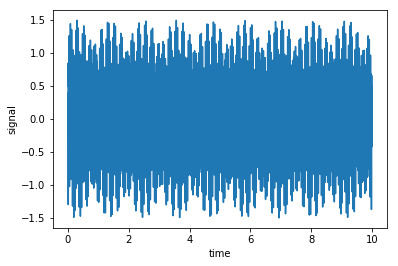

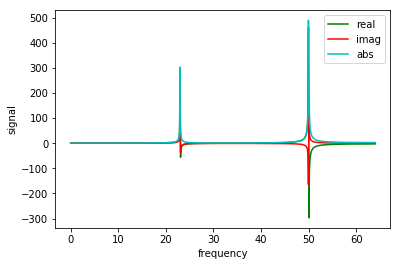

Rrelative error for original and recovered signals: 1.05350e-14


In [111]:
import matplotlib.pyplot as plt
import numpy as np
#import scipy.fftpack

fs = 1./128.
T = 10.
Ns = int(T/fs)
t = np.linspace(0, T, Ns)

fHz1 = 50. # Herz
fHz2 = 23
a = np.sin(fHz1 * 2.0*np.pi*t) + 0.5*np.cos(fHz2 * 2.0*np.pi*t)# + 0.7*np.random.uniform(-1, 1, size=t.shape)
plt.plot(t, a)
plt.xlabel('time')
plt.ylabel('signal')
plt.show()

ta = np.fft.rfft(a)
w = np.fft.rfftfreq(Ns, t[1]-t[0])
plt.plot(w, ta.real, 'g', label='real')
plt.plot(w, ta.imag, 'r', label='imag')
plt.plot(w, np.abs(ta), 'c', label='abs')
plt.xlabel('frequency')
plt.ylabel('signal')
plt.legend()
plt.show()

ra = np.fft.irfft(ta)
print "Rrelative error for original and recovered signals: %.5e" % (np.linalg.norm(a-ra))#/np.linalg.norm(a))

## Дискретное преобразование Фурье

На практике используются, во-первых, дисретные версии сигналов, а во-вторых, с конечным числом отсчётов. По этим причинам для их обработки требуется дискретная версия преобразования Фурье:

$$X_k = \frac{1}{\sqrt{N}}\sum\limits_{n=0}^{N-1} x_n e^{-i\frac{2 \pi n}{N} k}$$
$$x_n = \frac{1}{\sqrt{N}}\sum\limits_{k=0}^{N-1} X_k e^{i\frac{2 \pi k}{N} n}$$

Данные формулы получаются из следующих соображений: интервал $[0, 2\pi]$ равномерно разбивается на $N-1$ отрезков, сигнал из $N$ отсчётов периодически продолжается на бесконечность (с периодом $N$), и рассматривается ряд Фурье для построенного продолжения:
$$x(t_n) = x(\frac{n}{N}T) = \sum\limits_{k=-\infty}^{\infty} c_k e^{i \frac{2 \pi k}{}}$$


## Оконное преобразование Фурье

Оконное преобразование Фурье (short-time FT) в ряде случаев позволяет локализовать частотные изменения сигнала во времени. Оно определяется следующим образом:

$${STFT}[f(t)](\tau, \omega) = F(\tau, \omega) = \int\limits_{-\infty}^{\infty} w(t - \tau)f(t) e^{-i \omega t} dt$$

$w(z)$ - функция окна, выделяет часть сигнала, для которой строится преобразование Фурье. На практике сигнал делится на части с перекрытием, ширина которого также является дополнительным параметром.

Распространённые типы окон:

$$w(z) = \begin{cases}
1, & |z| \leq 1, \\
0, & |z| > 1
\end{cases}, \quad \text{(прямоугольное)}$$

$$w(z) = \begin{cases}
1-|z|, & |z| \leq 1, \\
0, & |z| > 1
\end{cases}, \quad \text{(треугольное)}$$

$$w(z) = \begin{cases}
\sin^2(\pi z), & |z| \leq 1, \\
0, & |z| > 1
\end{cases}, \quad \text{(окно Ханна)}$$

От выбора окна зависит результат преобразования, можно добиться более чёткого выделения частот (см. проблема spectral leakage).

Один из вариантов оконного преобразования Фурье носит название преобразование Габора. Окно в нём представляет собой функцию Гаусса (Гауссиану):

$$w(z) = \exp\Big( - \pi z^2 \Big)$$

Отметим, что помимо преобразования Габора существует также вейвлет Габора, функция вида

$$W(z) = \exp\Big( - \alpha^2 z^2 \Big) \exp\Big( i 2 \pi f_0 z \Big), $$

которая, как видно, представляет собой амплитудную модуляцию плоской волны с помощью Гаусиана. Вейвлет функция Габора интересна тем, что минимизирует т.н. отношение неопределённости - невозможность получить сколь угодно хорошее разрешение одновременно по частоте и по времени для одномерного сигнала:
$$\sigma_t \cdot \sigma_f \geq \frac{1}{4 \pi},
\quad \sigma_t = \frac{\int t^2 |x(t)|^2 dt}{\int |x(t)|^2 dt}, \,
\quad \sigma_t = \frac{\int f^2 |\mathcal{F}[x](f)|^2 df}{\int |\mathcal{F}[x](f)|^2 df}, \,
\text{ (стандартные отклонения) }$$

О вейвлетах буден сказано далее.

## Теорема Котельникова-Шеннона

Данная теорема даёт условие однозначного восстановления непрерывного сигнала по его отсчётам:

Для однозначного восстановления непрерывной функции $s(t)$, имеющей частоты в диапазоне $[0, f_1]$, требуется сэмплировать его с частотой дискретизации $2*f_1$. 

Формула для восстановления выглядит следующим образом:

$$s(t) = \sum\limits_{k=-\infty}^{\infty} s(k\tau) \cdot {sinc}\big(\frac{\pi}{\tau}(t-k\tau)\big)$$

Можно показать, что в случае, если сигнал сэмплирется с меньшей частотой дискретизации, то происходит наложение частот, которое препятствует однозначному восстановлению. Утверждение справедливо и в том случае, если спектр сигнала ограничен с двух сторон, $\mathcal{F}[s](f) \neq 0 \iff f\in [\hat{f_0}, \hat{f_1}]$, и $f_1 = \hat{f_1}-\hat{f_0}$.

Далее теорема понадобится нам при построении дискретизации непрерывных вейвлетов.

## Вейвлеты

Вейвлет-преобразования были построены для анализа сигналов, в которых одновременно присутствуют как длящиеся составляющие на низких частотах, так и короткие включения с высокой частотой. Кроме того, классические вейвлеты являются функциями с финитным носителем, что является преимуществом в задачах поиска компактного представления данных.

**Непрерывное вейвлет-преобразование** одномерного сигнала $f(t)$:

\begin{equation}
\label{eq:wavedec_cont}
W( \tau, s) = 
 \frac{1}{\sqrt{s}} \int\limits_{-\infty}^{+\infty} f(t) \psi\Big(\frac{t - \tau}{s}\Big) dt = 
\big( f, \psi_{\tau, s} \big)_{L_2} ,
\end{equation}

где $\psi_{\tau, s} = s^{-1/2} \psi(\frac{t - \tau}{s})$ - материнский вейвлет. Классическая теория вейвлетов
построена для случая $\psi(z) \in L_2(\mathbb{R})$.

Параметр $s \in \mathbb{R}\backslash\{0\}$ отвечает за масштабирование, параметр $\tau \in \mathbb{R}$ - за сдвиг. 

Восстановление сигнала:
\begin{equation}
f(t) = \frac{1}{C_{\psi}} \int\limits_{-\infty}^{+\infty} \int\limits_{-\infty}^{+\infty}
\frac{\big(f, \psi_{\tau, s}\big)_{L_2}}{\tau^2} \psi_{\tau, s} d \tau d s
\end{equation}

Константа $C_{\psi}$ зависит только от материнского вейвлета и определяется выражением
\begin{equation}
C_{\psi} = 2 \pi \int\limits_{-\infty}^{+\infty} \frac{\left|  \mathcal{F}[\psi] (\omega) \ \right|^2}{|\omega|} d \omega,
\end{equation}
и для того, чтобы формула восстановления сигнала имела смысл, требуется выполнение
условия $\int\limits_{-\infty}^{+\infty} \psi(t) dt = 0$. 

Для использования вейвлет-преобразования на практике вводят дискретизацию параметров
сдвига и масштабирования:
\begin{equation}
\label{eq:wavedec_disc}
W_{m, n} = \frac{1}{\sqrt{|s_m|}} \int\limits_{-\infty}^{+\infty} f(t) \psi\Big(\frac{t - \tau_n}{s_m}\Big) dt = 
s_0^{-m/2} \int\limits_{-\infty}^{+\infty} f(t) \psi(s_0^{-m} t - n \tau_0) dt ,
\end{equation}
 $\tau_n = \tau_n(m) = n \tau_0 s_0^m$, $s_m = s_0^m$, $m, n \in \mathbb{Z}$, $s_0 > 1$, $\tau_0 > 0$.
Дискретизация проводится из следующих соображений \cite{daubechies2001ten}:
при росте $m$ уменьшается ширина вейвлет-функции $\psi_{m, n}(z)$,
и потому $\tau_n$ следует сдвигать большими шагами.

## Mexican hat (Ricker wavelet)

Вейвлет-функция представляет собой масштабированную версию отрицательной второй производной функции Гаусса:

$$\psi(t) = \frac{2}{\sqrt{3 \sigma} \pi^{1/4} } \Big( 1 - \Big( \frac{t}{\sigma}\Big)^2\Big) \exp \Big(- \frac{t^2}{2 \sigma^2}\Big)$$


/home/pavel/apd/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """


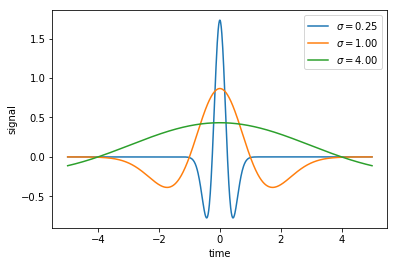

In [116]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

t = np.linspace(-5, 5, 1000.)
f = lambda t, sigma: 2./((3*sigma)**0.5 * np.pi**0.25) * (1 - (t/sigma)**2.) * np.exp(-t**2/(2.*sigma**2.))

sigmas = [0.25, 1., 4.]
for i in xrange(len(sigmas)):
    sigma = sigmas[i]
    plt.plot(t, f(t, sigma), label=r'$\sigma=$%.2f' % sigma)
plt.legend()
plt.xlabel('time')
plt.ylabel('signal')
plt.show()

## Дискретные вейвлет-преобразования

Вейвлеты интересны тем, что образуют семейства, каждый представитель которого получается из материнского вейвлета изменением масштаба и сдвигом. С помощью вейвлетов можно строить базисы пространства $L_2(\mathbb{R})$.

Кратно-масштабный анализ был предложен учёным Малла как способ построения базиса пространства $L_2(\mathbb{R})$.
Рассматривается цепочка вложенных пространств $\{V_m\}$, аппроксимирующих пространство $L_2(\mathbb{R})$:

$$\ldots \subset V_1 \subset V_0 \subset V_{-1} \subset \ldots \, (1), \quad \overline{\cup V_m} = L_2(\mathbb{R}), \, (2) \quad \cap V_m = 0, \, (3)$$

причём  справедливо $ f \in V_m \iff f(2^m) \in V_0$ (4) и для всех $f(x) \in V_m$ их сдвиги лежат в том же пространстве: $f(x - n 2^m) \in V_m$ (5). Последним важным условием является существование такой $\phi(t) \in V_0$, что все её целочисленные сдвиги образуют базис $V_0$ (6). Кратномасштабный анализ считается определённым при выполнении всех услоий (1)-(6).

Функция $\phi(t)$ из условия (6) называется масштабирующей функцией.

Основное следствие, вытекающее из шести рассмотренных выше условий, является следующее тождество:

$$P_{{}_{V_{m-1}}} f = P_{{}_{V_{m}}} + \sum\limits_{k \in \mathbb{Z}} \psi_{m, n}(f, \psi_{m, k})_{L_2} ,$$
где $P_{{}_{D}}$ - ортогональный проектор на $D$. Если ввести обозначение $W_m = V_m^{\perp}$, то тождеству соответсвует следующее разложение:
$$V_{m-1} = V_m \oplus W_m, \quad (W_i \perp W_j, \, i \neq j)$$

Отсюда получаем следующие важные представления:
$$V_m = V_M  \oplus {\large\oplus}_{k=0}^{M-m-1} W_{M-k}, \quad L_2(\mathbb{R}) = {\large\oplus}_{k \in \mathbb{Z}} W_{k}$$

В пространствах $W_m$ базис составлен из вейвлет-функций, в $V_m$ - из масштабирующих функций. При этом более точная аппроксимация пространства $L_2(\mathbb{R})$, $V_{m-1}$ является прямой суммой двух подпространств, соответсвующих одному уровню разложения. Здесь появляется аналогия с высоко и низкочастотной фильтрацией сигнала: высокочастотная соответсвуют деталям разложения и представляется в виде свёртки исходного сигнала с вейвлет-функцией, низкочастотной соответствует грубая аппроксимация сигнала, получаемая свёрткой сигнала с масштабирующей функцией. Переход между уровнями соотвествует разделению частоты на две полосы равного размера. Далее фильтрация происходит рекурсивно для грубых версий сигнала. Так как диапазон частот разделяется на две половины, то по теореме Котельникова-Шеннона мы можем прорядить эти две версии сигнала без потерь необходимой к обратному восстановлению информации. Таким образом, после применения обоих фильтров две версии сигнала прореживаются, и далее работа ведётся с огрублённой версией сигнала. Эта схема носит название лифтинговой схемы.

## Задания

1) (Robi Polikar) Рассмотрим сигналы
$$s_1(t) = \cos(2 \pi \cdot 10 t) + \cos(2 \pi \cdot 25 t) + \cos(2 \pi \cdot 50 t) + \cos(2 \pi \cdot 100 t)$$
$$s_2(t) = 
\begin{cases}
\sin(2 \pi \cdot 100 t), & t \in [0., 0.3) \\
\sin(2 \pi \cdot 50 t), & t \in [0.3, 0.6) \\
\sin(2 \pi \cdot 25 t), & t \in [0.6, 0.8) \\
\sin(2 \pi \cdot 10 t), & t \in [0.8, 1.0) \\
\end{cases}$$

Постройте графики этих сигналов на отрезке $[0, 1] \quad (sec)$. Подпишите оси, введите легенду. Что можно сказать о каждом сигнале?
Выполните быстрое преобразование Фурье этих сигналов. Отобразите модули коэффициентов, соответсвующие частотам от 0 до 150 Hz, снова не забудьте подписать оси и ввести легенду. Какие наблюдения можно сделатть о модулях коэффициентов преобразования Фурье? Оба ли сигнала имеют выраженные пики в окрестности одних и тех же частот? Если да, то чем можно объяснить такую схожесть разных сигналов?

2) Для сигналов из предыдущего задания постройтте оконное преобразование Фурье с длинами окон
$16, 32, 64, 128, 256, 512$ и разными окнами (boxcar, triang, blackman, hamming, hann).
Что можно сказать о сигналах, если анализировать их оконные преобразования? Как уменьшение и увеличение размера окна влияет на результат? Подтвердите ответ графиками с подписанными осями и названиями, в которых отражен номер сигнала, тип оконного преобразования и длина окна.

3) Теперь применим к сигналам вейвлет-преобразования Mexican Hat с разными $\sigma$ (используйте библиотеку pywt). Что можно сказать о результатах? Сравните с оконным преобразованием Фурье. Приведите графики.

4) Наконец, сожмём эти два сигнала с помощью дискретных вейвлетов Добеши (используйте библиотеку pywt).
Примените к обоим сигналам вейвлеты db1-db10 до максимально допустимого уровня разложения. Примените жёсткую пороговую обработку, восстановите сигналы. Сравните качество сжатия и качество восстановления ($\|s - \widehat{s}\|_F/\|s\|_F$). Отобразите информациб в виде графиков.

## Дополнительные материалы

http://disp.ee.ntu.edu.tw/~pujols/Gabor%20wavelet%20transform%20and%20its%20application.pdf

http://fourier.eng.hmc.edu/e161/lectures/wavelets/index.html

http://users.rowan.edu/~polikar/WTtutorial.html


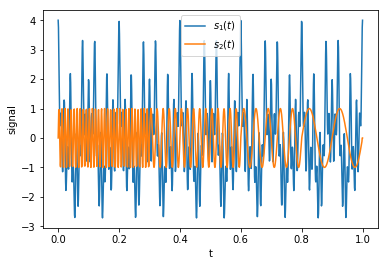

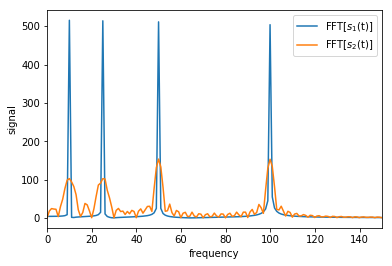

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import scipy.signal

Ns = 128

N = 1024
t = np.linspace(0., 1., N)
sr = float(N) / t[-1]

fs = [10, 25, 50, 100]
s1 = np.zeros(N)
s2 = np.zeros(N)
ind = 0
lengthes = [int(0.3*sr), int(0.3*sr), int(0.2*sr), int(0.2*sr)]
for k in xrange(len(fs)-1, -1, -1):
    offset = lengthes[::-1][k]
    s1 += np.cos(2*np.pi*fs[k]*t)
    s2[ind:ind+offset] = np.sin(2*np.pi*fs[k]*t[ind:ind+offset])
    ind += offset

plt.plot(t, s1, label='$s_1(t)$')
plt.plot(t, s2, label='$s_2(t)$')
plt.xlabel('t')
plt.ylabel('signal')
plt.legend()
plt.show()

fft_s1 = np.fft.rfft(s1)
fft_s2 = np.fft.rfft(s2)
freq = np.fft.rfftfreq(N, t[1]-t[0])


plt.plot(freq, np.abs(fft_s1), label='FFT[$s_1$(t)]')
plt.plot(freq, np.abs(fft_s2), label='FFT[$s_2$(t)]')
plt.xlim(0., 1.5*fs[-1])
plt.xlabel('frequency')
plt.ylabel('signal')
plt.legend()
plt.show()

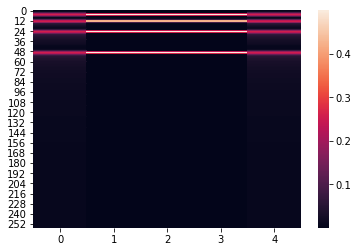

In [67]:
Ni = 512

f, t, z = scipy.signal.stft(
    s1, fs=1.0, window='hann', nperseg=Ni, noverlap=None, nfft=None,
    detrend=False, return_onesided=True, boundary='zeros', padded=True, axis=-1
)

sns.heatmap(np.abs(z))#, xticklabels=f, yticklabels=t)